<a href="https://colab.research.google.com/github/Risqi2112/Penelitian/blob/main/Data_Science_Playground_NYC_TLC_for_TalentHub/Final_Project_NYC_TLC_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re

##Data Understanding

**Dataset Trip**

image.png

**Dataset Passenger (train.csv)**

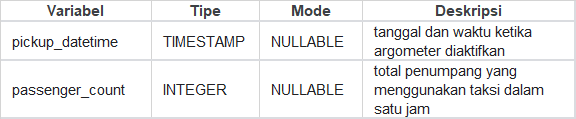

**Dataset Sample (sample.csv)**

image.png

**test.csv**

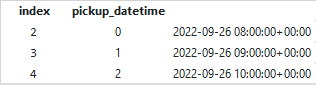



Upload Data Trips

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Risqi2112/Penelitian/main/Data_Science_Playground_NYC_TLC_for_TalentHub/trips.csv')
data

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2022-03-23 08:51:18.000000 UTC,2022-03-23 08:59:11.000000 UTC,1.0,0.95,1.0,N,1,7.0,0.0,0.5,2.06,0.00,0.3,0.00,12.36,262,236,2022,3
1,2,2022-03-03 10:58:28.000000 UTC,2022-03-03 11:07:36.000000 UTC,1.0,0.85,1.0,N,1,7.0,0.0,0.5,2.06,0.00,0.3,0.00,12.36,237,236,2022,3
2,2,2022-03-07 08:35:06.000000 UTC,2022-03-07 08:43:20.000000 UTC,1.0,1.08,1.0,N,1,7.0,0.0,0.5,2.06,0.00,0.3,0.00,12.36,100,170,2022,3
3,2,2022-03-12 20:53:31.000000 UTC,2022-03-12 21:02:21.000000 UTC,1.0,0.93,1.0,N,1,7.0,0.5,0.5,2.16,0.00,0.3,0.00,12.96,100,170,2022,3
4,2,2022-03-09 00:05:43.000000 UTC,2022-03-09 00:11:49.000000 UTC,2.0,1.38,1.0,N,1,7.0,0.5,0.5,2.16,0.00,0.3,0.00,12.96,163,100,2022,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54220,1,2022-03-12 02:00:03.000000 UTC,2022-03-12 02:22:35.000000 UTC,1.0,4.90,1.0,N,1,17.5,3.0,0.5,4.25,0.00,0.3,0.00,25.55,79,7,2022,3
54221,2,2022-03-21 12:05:31.000000 UTC,2022-03-21 12:33:16.000000 UTC,1.0,11.06,1.0,N,1,34.0,0.0,0.5,6.00,6.55,0.3,1.25,51.10,138,161,2022,3
54222,2,2022-03-06 19:07:37.000000 UTC,2022-03-06 19:24:46.000000 UTC,1.0,3.67,1.0,N,1,15.0,0.0,0.5,7.00,0.00,0.3,0.00,25.30,237,114,2022,3
54223,1,2022-03-24 13:00:31.000000 UTC,2022-03-24 13:22:35.000000 UTC,0.0,3.00,1.0,N,1,15.0,2.5,0.5,1.25,0.00,0.3,0.00,19.55,161,262,2022,3


# 2. Data Preparation

## Cleaning data

In [ ]:
# Remove the zone symbol '.000000 UTC' in the pickup_datetime and dropoff_datetime columns
def filtering(text):
    text = re.sub(r'.000000 UTC', '', text)
    return text

data['pickup_datetime'] = data['pickup_datetime'].apply(lambda x:filtering(x))
data['dropoff_datetime'] = data['dropoff_datetime'].apply(lambda x:filtering(x))
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2022-03-23 08:51:18,2022-03-23 08:59:11,1.0,0.95,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,262,236,2022,3
1,2,2022-03-03 10:58:28,2022-03-03 11:07:36,1.0,0.85,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,237,236,2022,3
2,2,2022-03-07 08:35:06,2022-03-07 08:43:20,1.0,1.08,1.0,N,1,7.0,0.0,0.5,2.06,0.0,0.3,0.0,12.36,100,170,2022,3
3,2,2022-03-12 20:53:31,2022-03-12 21:02:21,1.0,0.93,1.0,N,1,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,100,170,2022,3
4,2,2022-03-09 00:05:43,2022-03-09 00:11:49,2.0,1.38,1.0,N,1,7.0,0.5,0.5,2.16,0.0,0.3,0.0,12.96,163,100,2022,3


In [ ]:
# Changed the pickup_datetime and dropoff_datetime data types to format='%Y-%m-%d %H:%M:%S'
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime, format='%Y-%m-%d %H:%M:%S')

In [ ]:
data.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
count,54225.000000,53015.000000,54225.000000,53015.000000,54225.000000,54225.000000,54225.000000,54225.000000,54225.000000,54225.000000,54225.000000,53015.000000,54225.000000,54225.000000,54225.000000,54225.0,54225.000000
mean,1.714541,1.405414,3.942170,1.533132,1.204942,15.384128,1.014309,0.487917,2.799434,0.588710,0.295734,0.108648,22.284574,164.572964,162.089055,2022.0,6.342517
std,0.477442,0.969714,48.086847,6.561481,0.502566,14.505405,1.256638,0.096460,4.553078,2.061464,0.049964,0.354484,18.405944,65.045019,70.296662,0.0,2.863978
min,1.000000,0.000000,0.000000,1.000000,0.000000,-385.000000,-4.500000,-0.500000,-2.060000,-34.050000,-0.300000,-1.250000,-420.600000,1.000000,1.000000,2022.0,1.000000
25%,1.000000,1.000000,1.160000,1.000000,1.000000,7.000000,0.000000,0.500000,0.520000,0.000000,0.300000,0.000000,12.350000,132.000000,113.000000,2022.0,4.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,10.500000,0.500000,0.500000,2.160000,0.000000,0.300000,0.000000,16.300000,161.000000,162.000000,2022.0,7.000000
75%,2.000000,1.000000,3.800000,1.000000,1.000000,17.000000,2.500000,0.500000,3.390000,0.000000,0.300000,0.000000,23.750000,234.000000,234.000000,2022.0,9.000000
max,6.000000,8.000000,11147.540000,99.000000,4.000000,300.000000,8.250000,2.780000,733.430000,41.250000,0.300000,1.250000,748.730000,265.000000,265.000000,2022.0,11.000000


## Feature Transform



1. Pickup hour - from pickup_datetime
2. Pickup week day name
3. Pickup date
4. Pickup month
5. Pickup day of week in numbers (Monday:0, Tuesday:1, Wednesday:2, Thursday:3, Friday:4, Saturday:5, Sunday:6)


In [ ]:
data.loc[:, 'pickup_hour'] = data['pickup_datetime'].dt.hour
data.loc[:, 'pickup_weekday'] = data['pickup_datetime'].dt.day_name()
data.loc[:, 'pickup_date'] = data['pickup_datetime'].dt.day
data.loc[:, 'pickup_month'] = data['pickup_datetime'].dt.month
data.loc[:, 'pickup_day'] = data['pickup_datetime'].dt.dayofweek
data

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day
0,2,2022-03-23 08:51:18,2022-03-23 08:59:11,1.0,0.95,1.0,N,1,7.0,0.0,...,12.36,262,236,2022,3,8,Wednesday,23,3,2
1,2,2022-03-03 10:58:28,2022-03-03 11:07:36,1.0,0.85,1.0,N,1,7.0,0.0,...,12.36,237,236,2022,3,10,Thursday,3,3,3
2,2,2022-03-07 08:35:06,2022-03-07 08:43:20,1.0,1.08,1.0,N,1,7.0,0.0,...,12.36,100,170,2022,3,8,Monday,7,3,0
3,2,2022-03-12 20:53:31,2022-03-12 21:02:21,1.0,0.93,1.0,N,1,7.0,0.5,...,12.96,100,170,2022,3,20,Saturday,12,3,5
4,2,2022-03-09 00:05:43,2022-03-09 00:11:49,2.0,1.38,1.0,N,1,7.0,0.5,...,12.96,163,100,2022,3,0,Wednesday,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54220,1,2022-03-12 02:00:03,2022-03-12 02:22:35,1.0,4.90,1.0,N,1,17.5,3.0,...,25.55,79,7,2022,3,2,Saturday,12,3,5
54221,2,2022-03-21 12:05:31,2022-03-21 12:33:16,1.0,11.06,1.0,N,1,34.0,0.0,...,51.10,138,161,2022,3,12,Monday,21,3,0
54222,2,2022-03-06 19:07:37,2022-03-06 19:24:46,1.0,3.67,1.0,N,1,15.0,0.0,...,25.30,237,114,2022,3,19,Sunday,6,3,6
54223,1,2022-03-24 13:00:31,2022-03-24 13:22:35,0.0,3.00,1.0,N,1,15.0,2.5,...,19.55,161,262,2022,3,13,Thursday,24,3,3


Miles to Km conversion, calculating trip duration and average speed

In [ ]:
# Calculating trip duration
data.loc[:, 'trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds()
# Converting Mile to Km
data['trip_distance'] = data['trip_distance'] * 1.609344
# Calculating Average Speed in km/h
data.loc[:, 'average_speed'] = data['trip_distance'] / (data['trip_duration'] / 3600) # Second to Hour
data['fare_per_km'] = data['fare_amount'] / (data['trip_distance'])

In [ ]:
# Eliminate trips whose distance and duration = 0
data = data.drop(data[(data.trip_duration < 60) | (data.trip_duration > (3600 * 2.5))].index)
data = data.drop(data[(data.trip_distance == 0) | (data.trip_distance > 100)].index)

# Reset indices
data = data.reset_index(drop = True)
#data['pickup_date'] = pd.to_datetime(data['pickup_datetime'].dt.date)

In [ ]:
data.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,dropoff_location_id,data_file_year,data_file_month,pickup_hour,pickup_date,pickup_month,pickup_day,trip_duration,average_speed,fare_per_km
count,53262.000000,52157.000000,53262.000000,52157.000000,53262.000000,53262.000000,53262.000000,53262.000000,53262.000000,53262.000000,...,53262.000000,53262.0,53262.000000,53262.000000,53262.000000,53262.000000,53262.000000,53262.000000,53262.000000,53262.000000
mean,1.713210,1.405928,6.093947,1.437372,1.201814,15.089624,1.026114,0.491575,2.786741,0.584523,...,162.046206,2022.0,6.343585,14.198134,15.697589,6.343566,2.964665,991.723311,19.679517,3.591410
std,0.466973,0.970614,7.535035,6.002391,0.490225,13.581946,1.257209,0.083113,4.498113,2.041858,...,70.221439,0.0,2.856107,5.727124,8.755651,2.856119,1.922366,786.414367,11.048400,18.220121
min,1.000000,0.000000,0.016093,1.000000,0.000000,-67.000000,-4.500000,-0.500000,-0.010000,-6.550000,...,1.000000,2022.0,1.000000,0.000000,1.000000,1.000000,0.000000,60.000000,0.027611,-416.318699
25%,1.000000,1.000000,1.931213,1.000000,1.000000,7.000000,0.000000,0.500000,1.000000,0.000000,...,113.000000,2022.0,4.000000,11.000000,8.000000,4.000000,1.000000,463.000000,12.649866,2.473843
50%,2.000000,1.000000,3.218688,1.000000,1.000000,10.500000,0.500000,0.500000,2.160000,0.000000,...,162.000000,2022.0,7.000000,15.000000,16.000000,7.000000,3.000000,773.000000,16.707844,3.135359
75%,2.000000,1.000000,6.147694,1.000000,1.000000,17.000000,2.500000,0.500000,3.380000,0.000000,...,234.000000,2022.0,9.000000,19.000000,23.000000,9.000000,5.000000,1237.000000,23.187599,3.954180
max,6.000000,7.000000,88.739228,99.000000,4.000000,300.000000,8.250000,2.780000,733.430000,41.250000,...,265.000000,2022.0,11.000000,23.000000,31.000000,11.000000,6.000000,8963.000000,249.280474,3516.960948


Get location_id

In [ ]:
import pandas as pd
data2 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/taxi-zone-lookup.csv')
data2

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,Unknown


In [ ]:
data = pd.merge(data, data2, left_on='pickup_location_id', right_on='LocationID')
data = pd.merge(data, data2, left_on='dropoff_location_id', right_on='LocationID')
data.drop(['LocationID_y'],inplace=True,axis=1)
data.drop(['LocationID_x'],inplace=True,axis=1)
data.drop(['Borough_y'],inplace=True,axis=1)
data.drop(['Borough_x'],inplace=True,axis=1)
data.drop(['pickup_location_id'],inplace=True,axis=1)
data.drop(['dropoff_location_id'],inplace=True,axis=1)
data['pickup_location_id'] = data['Zone_x']
data['dropoff_location_id'] = data['Zone_y']
data.drop(['Zone_x'],inplace=True,axis=1)
data.drop(['Zone_y'],inplace=True,axis=1)

data

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,trip_duration,average_speed,fare_per_km,pickup_location_id,dropoff_location_id
0,2,2022-03-23 08:51:18,2022-03-23 08:59:11,1.0,1.528877,1.0,N,1,7.0,0.0,...,8,Wednesday,23,3,2,473.0,11.636272,4.578525,Yorkville East,Upper East Side North
1,2,2022-09-08 09:17:49,2022-09-08 09:24:59,1.0,1.770278,1.0,N,1,6.5,0.0,...,9,Thursday,8,9,3,430.0,14.820935,3.671739,Yorkville East,Upper East Side North
2,1,2022-09-16 12:54:03,2022-09-16 13:01:10,1.0,1.448410,1.0,N,1,6.5,2.5,...,12,Friday,16,9,4,427.0,12.211416,4.487681,Yorkville East,Upper East Side North
3,2,2022-10-02 13:00:52,2022-10-02 13:04:24,1.0,0.611551,1.0,N,1,4.0,0.0,...,13,Sunday,2,10,6,212.0,10.384824,6.540749,Yorkville East,Upper East Side North
4,1,2022-08-26 07:17:27,2022-08-26 07:23:45,1.0,2.092147,1.0,N,1,6.5,2.5,...,7,Friday,26,8,4,378.0,19.925211,3.106856,Yorkville East,Upper East Side North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53257,2,2022-04-21 00:29:45,2022-04-21 00:58:52,1.0,26.200120,1.0,N,1,45.0,0.5,...,0,Thursday,21,4,3,1747.0,53.989945,1.717549,East Chelsea,Van Cortlandt Park
53258,2,2022-06-16 13:25:15,2022-06-16 14:09:50,1.0,16.865925,1.0,N,1,38.5,0.0,...,13,Thursday,16,6,3,2675.0,22.698067,2.282709,Times Sq/Theatre District,Marble Hill
53259,1,2022-03-17 13:23:46,2022-03-17 14:07:25,1.0,23.979226,1.0,N,1,46.0,0.0,...,13,Thursday,17,3,3,2619.0,32.961135,1.918327,Downtown Brooklyn/MetroTech,Saint George/New Brighton
53260,1,2022-10-22 17:12:44,2022-10-22 17:52:09,1.0,11.426342,99.0,N,1,26.2,0.0,...,17,Saturday,22,10,5,2365.0,17.393164,2.292947,Mariners Harbor,Oakwood


In [ ]:
# Save EDA data for visualization in Tableau
data.to_csv('EDA.csv')

# 3. EDA

Exploratory Data Analysis was conducted on the **Tableau** platform.

## Visualization

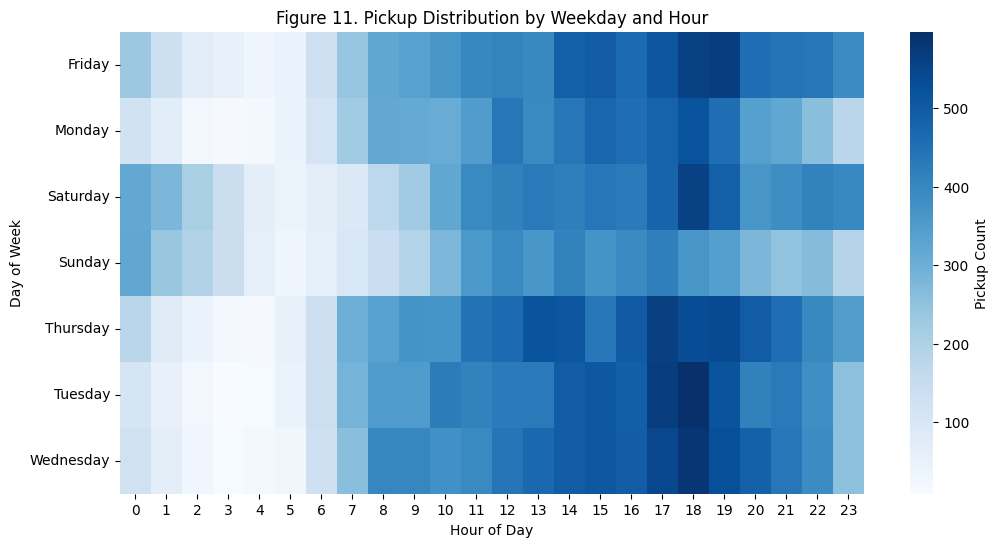

In [ ]:
grouped = data.groupby(['pickup_weekday', 'pickup_hour']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(grouped, cmap='Blues', cbar_kws={'label': 'Pickup Count'})
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Pickup Distribution by Weekday and Hour')
plt.show()

<ipython-input-32-f19d45070b06>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(data.corr()), annot=True)


Text(0.5, 1.0, 'Figure 23. Correlations')

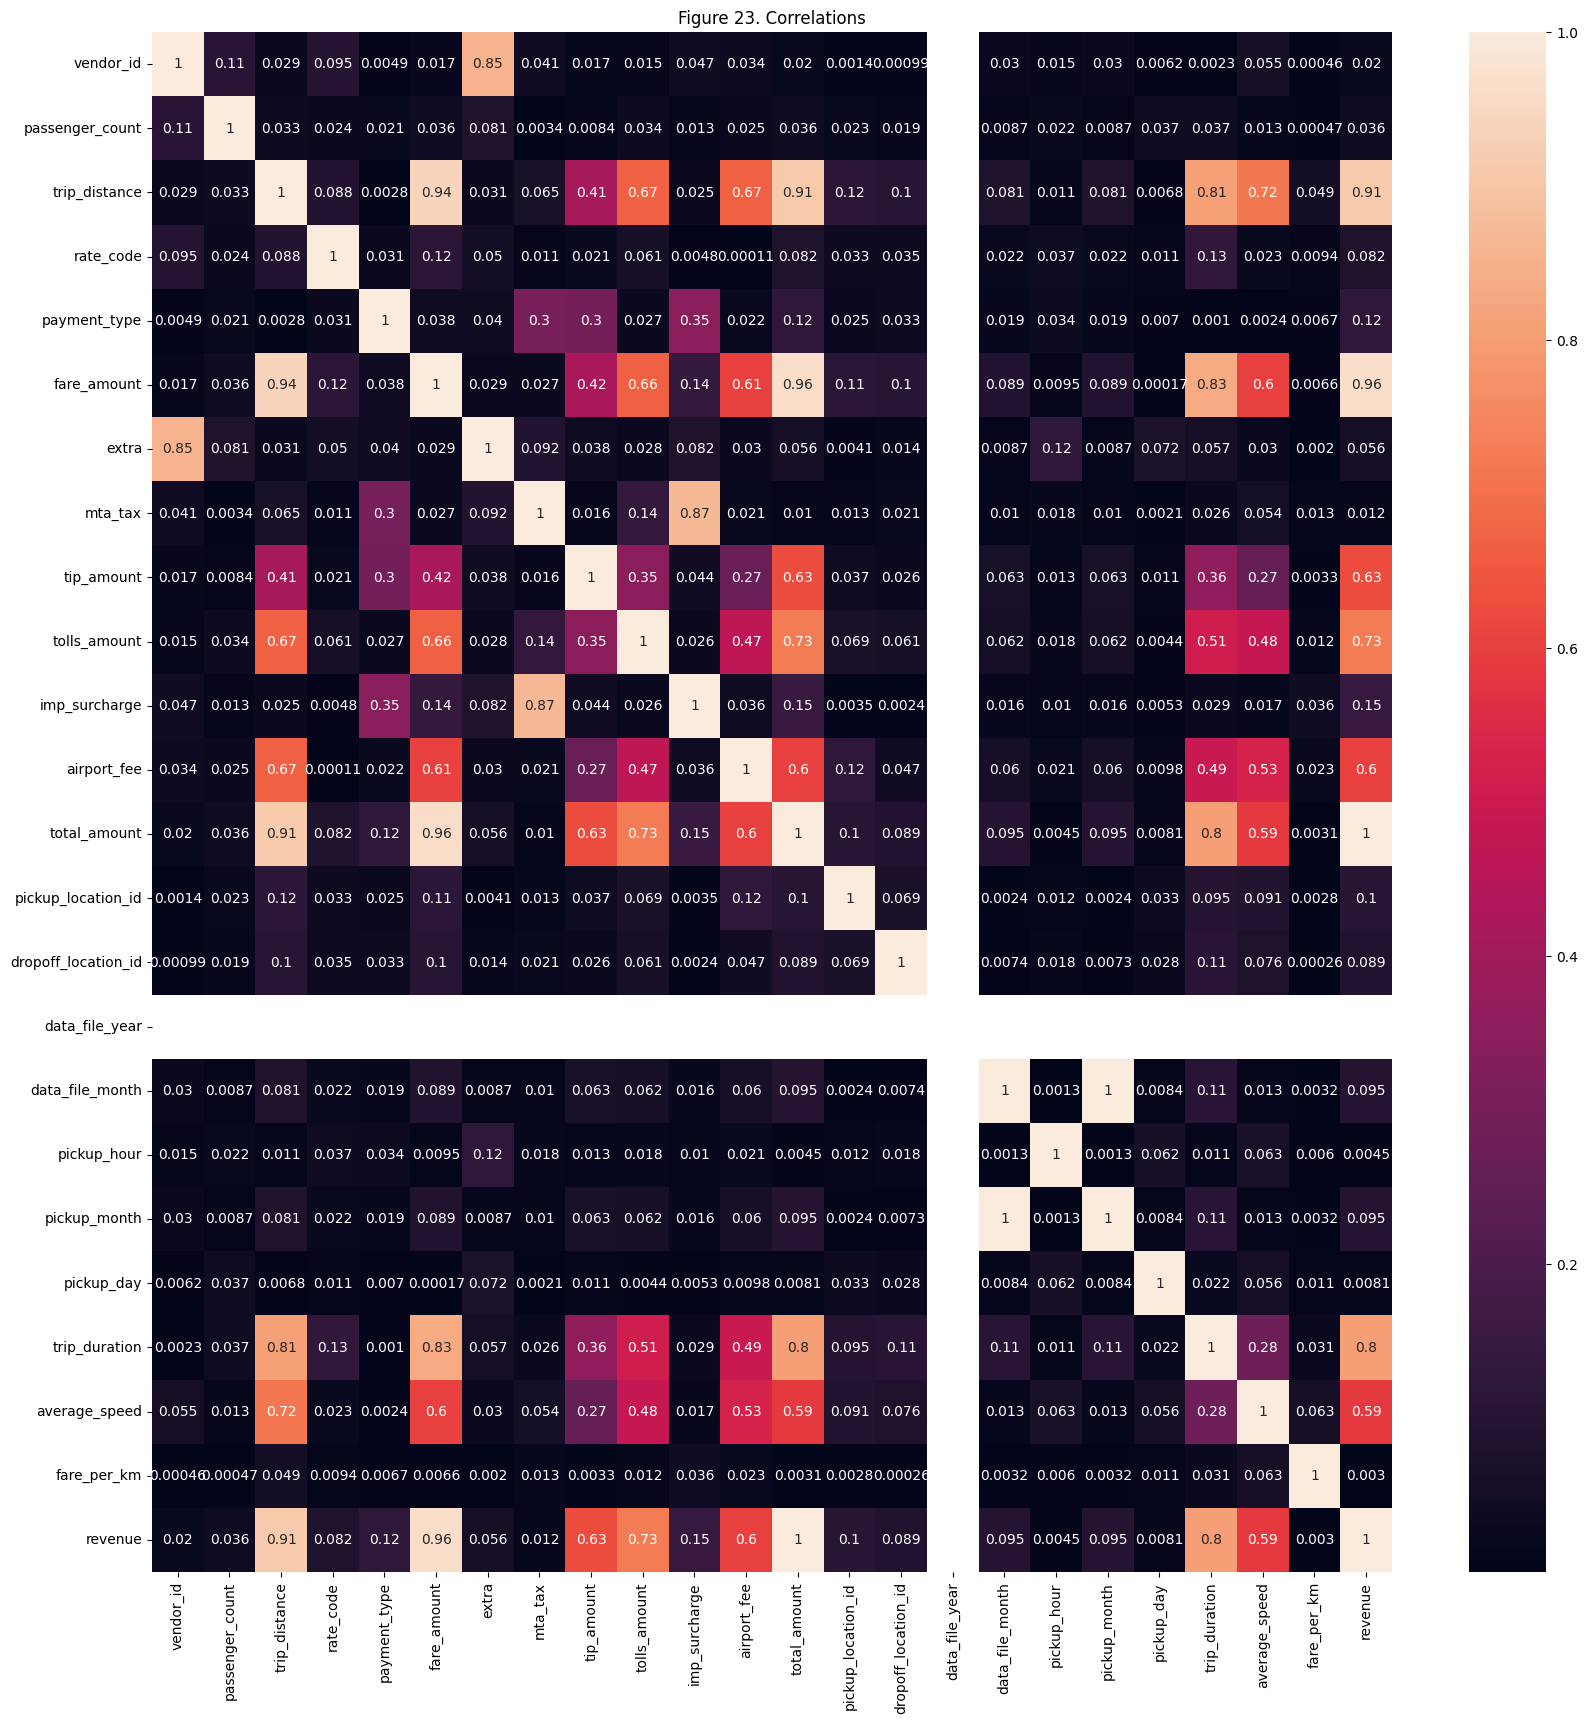

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(data.corr()), annot=True)
plt.title('Correlations')

# 4. Prediction Models

Prediksi kapan waktunya harus menyediakan mobil tambahan di kota untuk melayani semua permintaan yang masuk

*  Siapkan data train dan data pengujian
*  Pada penelitian ini menggunakan model Gradient Boost Decision Tree (GBDT) oleh catboost.

In [ ]:
!pip install autogluon -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... 

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.inspection import permutation_importance
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read trainig_data
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/Risqi2112/Penelitian/main/Data_Science_Playground_NYC_TLC_for_TalentHub/train.csv")
dataset

,pickup_datetime,passenger_count
0,2022-01-06 14:00:00+00:00,8.0
1,2022-01-06 15:00:00+00:00,3.0
2,2022-01-06 16:00:00+00:00,0.0
3,2022-01-06 17:00:00+00:00,0.0
4,2022-01-06 18:00:00+00:00,7.0
...,...,...
6301,2022-09-26 03:00:00+00:00,1.0
6302,2022-09-26 04:00:00+00:00,1.0
6303,2022-09-26 05:00:00+00:00,4.0
6304,2022-09-26 06:00:00+00:00,1.0


In [ ]:
# Mengubah format pickup_datetime menjadi float untuk diterapkan pada model

from datetime import datetime

for date in dataset['pickup_datetime']:
    dt = datetime.strptime(date, '%Y-%m-%d %H:%M:%S%z')
    dt = dt.timestamp()
    dt = datetime.fromtimestamp(dt)
    dt = pd.to_datetime(dt, format='%Y-%m-%d %H:%M:%S%z')
    dataset['pickup_datetime'] = dataset['pickup_datetime'].replace(date, dt)

dataset

,pickup_datetime,passenger_count
0,2022-01-06 14:00:00,8.0
1,2022-01-06 15:00:00,3.0
2,2022-01-06 16:00:00,0.0
3,2022-01-06 17:00:00,0.0
4,2022-01-06 18:00:00,7.0
...,...,...
6301,2022-09-26 03:00:00,1.0
6302,2022-09-26 04:00:00,1.0
6303,2022-09-26 05:00:00,4.0
6304,2022-09-26 06:00:00,1.0


In [ ]:
# Menambah kolom baru untuk dianalisis model
dataset.loc[:, 'month'] = dataset['pickup_datetime'].dt.month
dataset.loc[:, 'date'] = dataset['pickup_datetime'].dt.day
dataset.loc[:, 'hour'] = dataset['pickup_datetime'].dt.hour
dataset.loc[:, 'pickup_day'] = dataset['pickup_datetime'].dt.dayofweek

# Menghapus kolom pickup_datetime
dataset.drop(['pickup_datetime'],inplace=True,axis=1)
dataset

,passenger_count,month,date,hour,pickup_day
0,8.0,1,6,14,3
1,3.0,1,6,15,3
2,0.0,1,6,16,3
3,0.0,1,6,17,3
4,7.0,1,6,18,3
...,...,...,...,...,...
6301,1.0,9,26,3,0
6302,1.0,9,26,4,0
6303,4.0,9,26,5,0
6304,1.0,9,26,6,0


In [ ]:
dataset.describe()

,passenger_count,month,date,hour,pickup_day
count,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000
mean,9.533936,5.032984,15.722804,11.500951,3.019029
std,7.961418,2.506681,8.598872,6.925759,2.001970
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,3.000000,8.000000,5.000000,1.000000
50%,8.000000,5.000000,16.000000,12.000000,3.000000
75%,15.000000,7.000000,23.000000,18.000000,5.000000
max,41.000000,9.000000,31.000000,23.000000,6.000000


## Split data

In [ ]:
# split the data into inputs and outputs
# storing the input and output variables
X = dataset.drop('passenger_count', axis=1)
y = dataset.passenger_count

Membagi dataset menjadi 75% data untuk melatih model dan 25% untuk pengujian.

In [ ]:
#Training and testing data
# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

In [ ]:
# print("Size of testing dataset'X_test.shape
print("Shape of training input data is :",X_train.shape)
print("Shape of testing input data is :",X_test.shape)

Shape of training input data is : (4729, 4)
Shape of testing input data is : (1577, 4)


In [ ]:
# Memisahkan kumpulan data untuk "Model Selection with AutoGluon"
def data_split(dataset):
    # split data into 2 parts: train (75%), test*(25%) : simple approach now (cross validation is a better option)
    split_point = int(dataset.shape[0]*.75)
    train_df = dataset.iloc[:split_point]
    test_df =  dataset.iloc[split_point:]
    assert dataset.shape[0] == train_df.shape[0]+test_df.shape[0] # check the number
    return train_df, test_df

train_df, test_df = data_split(dataset)

In [ ]:
label='passenger_count'

y_test1 = test_df[label]  # values to predict
X_test1 = test_df.drop(columns=[label])  # delete label column to prove we're not cheating

## Model Selection with AutoGluon

In [ ]:
label='passenger_count'
save_path = 'agModels-predict_passenger_count'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path, problem_type="regression").fit(train_df)

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predict_passenger_count/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jun 9 10:57:30 UTC 2023
Disk Space Avail:   81.20 GB / 115.66 GB (70.2%)
Train Data Rows:    4729
Train Data Columns: 4
Label Column: passenger_count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11826.65 MB
	Train Data (Original)  Memory Usage: 0.15 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	S

In [ ]:
predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file
y_pred = predictor.predict(X_test1)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test1, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -5.97604449271796
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -5.97604449271796,
    "mean_squared_error": -35.71310777894466,
    "mean_absolute_error": -4.506674027813335,
    "r2": 0.4650410776681153,
    "pearsonr": 0.7000210893982698,
    "median_absolute_error": -3.292572021484375
}


Predictions:  
 4729    19.023888
4730    23.538425
4731    22.088810
4732    22.489977
4733    25.503193
          ...    
6301     2.631530
6302     2.715411
6303     3.903233
6304     5.796312
6305     8.756267
Name: passenger_count, Length: 1577, dtype: float32


In [ ]:
predictor.leaderboard(test_df, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,-5.805862,-4.421783,0.007664,0.003796,1.298070,0.007664,0.003796,1.298070,1,True,6
1,LightGBM,-5.810997,-4.422597,0.019891,0.005810,0.372146,0.019891,0.005810,0.372146,1,True,4
2,XGBoost,-5.904192,-4.419506,0.029992,0.010576,0.543978,0.029992,0.010576,0.543978,1,True,9
3,WeightedEnsemble_L2,-5.976044,-4.333141,0.424113,0.124166,10.230418,0.006937,0.004521,0.331949,2,True,12
4,LightGBMXT,-6.033229,-4.562513,0.051398,0.012766,1.713777,0.051398,0.012766,1.713777,1,True,3
5,LightGBMLarge,-6.053162,-4.491170,0.043235,0.007293,0.769694,0.043235,0.007293,0.769694,1,True,11
6,ExtraTreesMSE,-6.268838,-4.428810,0.323964,0.086841,1.381591,0.323964,0.086841,1.381591,1,True,7
7,NeuralNetTorch,-6.337752,-4.961634,0.020854,0.006705,14.136133,0.020854,0.006705,14.136133,1,True,10
8,NeuralNetFastAI,-6.343453,-4.455880,0.063220,0.022228,7.972900,0.063220,0.022228,7.972900,1,True,8
9,RandomForestMSE,-6.378634,-4.624873,0.346520,0.087116,1.977109,0.346520,0.087116,1.977109,1,True,5


Berdasarkan peringkat, sepertinya catboost adalah model yang bagus untuk kasus ini.

## Training model by GDBT (CatBoost Model)

In [ ]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# initializing the model
cbr = CatBoostRegressor()
# training the model
cbr = cbr.fit(X_train, y_train)

Learning rate set to 0.052335
0:	learn: 7.7976315	total: 47.3ms	remaining: 47.3s
1:	learn: 7.6207593	total: 48.6ms	remaining: 24.3s
2:	learn: 7.4604201	total: 49.8ms	remaining: 16.5s
3:	learn: 7.3160809	total: 50.8ms	remaining: 12.6s
4:	learn: 7.1655781	total: 52.6ms	remaining: 10.5s
5:	learn: 7.0195093	total: 53.5ms	remaining: 8.86s
6:	learn: 6.9063198	total: 54.3ms	remaining: 7.7s
7:	learn: 6.7779097	total: 55.1ms	remaining: 6.84s
8:	learn: 6.6756662	total: 56.1ms	remaining: 6.18s
9:	learn: 6.5711214	total: 57ms	remaining: 5.64s
10:	learn: 6.4760416	total: 58ms	remaining: 5.22s
11:	learn: 6.3830071	total: 58.9ms	remaining: 4.85s
12:	learn: 6.2991379	total: 60ms	remaining: 4.55s
13:	learn: 6.2171671	total: 60.8ms	remaining: 4.28s
14:	learn: 6.1524414	total: 61.6ms	remaining: 4.04s
15:	learn: 6.0961010	total: 62.3ms	remaining: 3.83s
16:	learn: 6.0318370	total: 63.1ms	remaining: 3.65s
17:	learn: 5.9675234	total: 64.1ms	remaining: 3.49s
18:	learn: 5.9106272	total: 65.1ms	remaining: 3.36s

In [ ]:
# Pengujian
cbr_prediction = cbr.predict(X_test)

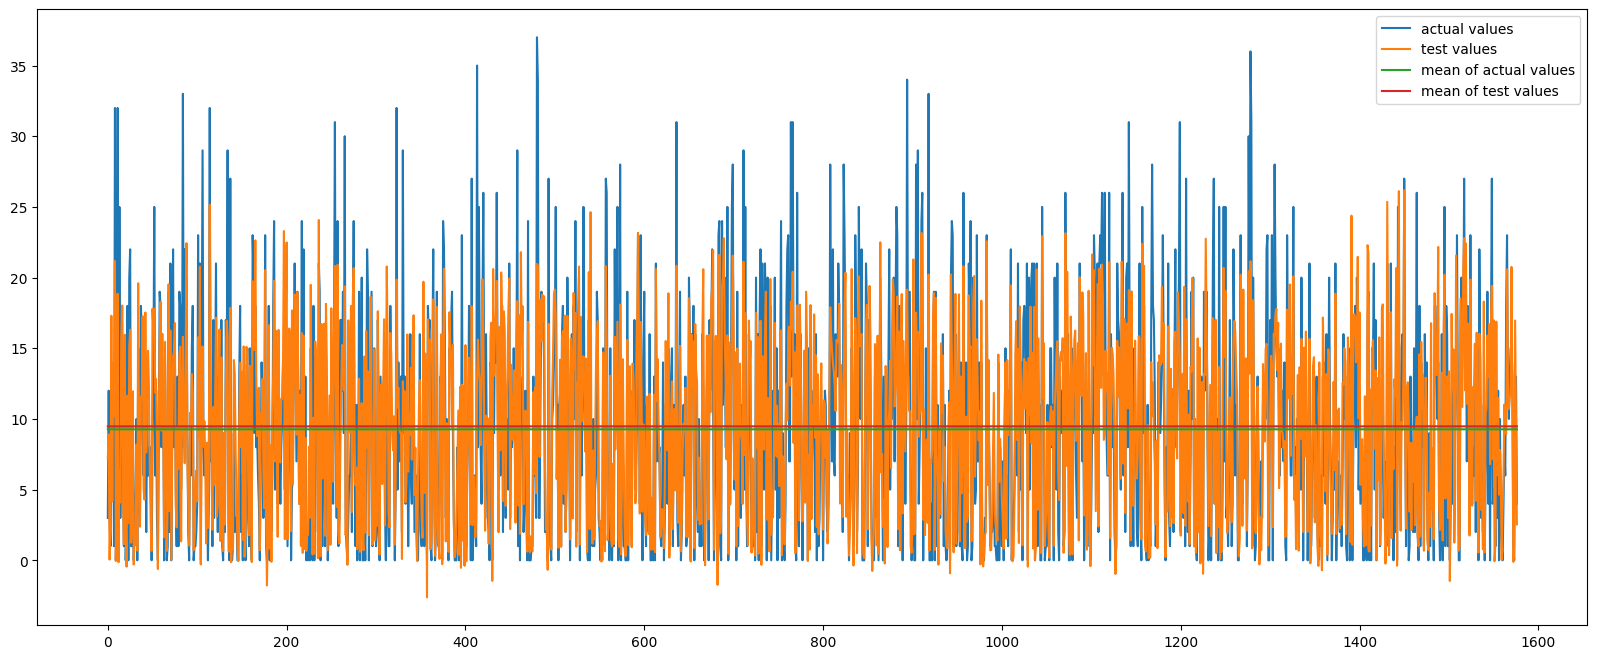

Mean of actual values :  9.267596702599873
Mean of test values:  9.476468074397122

R-square score is : 0.6455078835079607
MSE score is : 21.864110342993705
MAE score is : 3.4536357096384886
MAPE score is : 1017892897703511.6


In [ ]:
# Rata-rata nilai aktual dan prediksi untuk melihat seberapa dekat keduanya.
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],cbr_prediction, label="test values")
plt.plot([i for i in range(len(y_test))],[y_test.mean() for x in range(len(y_test))], label = "mean of actual values")
plt.plot([i for i in range(len(y_test))],[cbr_prediction.mean() for y in range(len(y_test))], label = 'mean of test values')
# showing the plotting
plt.legend()
plt.show()

# printing the mean
print("Mean of actual values : ", y_test.mean())
print("Mean of test values: ", cbr_prediction.mean())
print("")
# Evaluating the model
print('R-square score is :', r2_score(y_test, cbr_prediction))
print('MSE score is :', mean_squared_error(y_test, cbr_prediction))
print('MAE score is :', mean_absolute_error(y_test, cbr_prediction))
print('MAPE score is :', mean_absolute_percentage_error(y_test, cbr_prediction))

Perhatikan bahwa rata-rata test dan nilai sebenarnya cukup dekat, yang menunjukkan bahwa prediksi kami cukup baik.

## Model evaluation

* **r2_score** merupakan ukuran statistik yang mewakili proporsi varians suatu variabel terikat yang dapat dijelaskan oleh variabel bebas. Nilai normal skor R2 adalah antara 0 dan 1. Semakin mendekati nilai 1, semakin baik prediksinya. Jika nilainya negatif, model gagal dalam prediksi.
* **mean_squared_error (MSE)** : menghitung kuadrat semua kesalahan dan meratakannya pada jumlah pengamatan. Semakin rendah MSE, semakin akurat hasil prediksi. Metrik ini mengukur selisih kuadrat rata-rata antara nilai prediksi dan nilai sebenarnya.
* **mean_absolute_error** merupakan
*  **mean_absolute_percentage_error** merupakan

## Predictions to new data

In [ ]:
import pandas as pd
import numpy as np
# Read test_data
test_data = pd.read_csv("https://raw.githubusercontent.com/Risqi2112/Penelitian/main/Data_Science_Playground_NYC_TLC_for_TalentHub/test.csv")
test_data

,index,pickup_datetime
0,0,2022-09-26 08:00:00+00:00
1,1,2022-09-26 09:00:00+00:00
2,2,2022-09-26 10:00:00+00:00
3,3,2022-09-26 11:00:00+00:00
4,4,2022-09-26 12:00:00+00:00
...,...,...
1571,1571,2022-11-30 19:00:00+00:00
1572,1572,2022-11-30 20:00:00+00:00
1573,1573,2022-11-30 21:00:00+00:00
1574,1574,2022-11-30 22:00:00+00:00


In [ ]:
# Mengubah format pickup_datetime menjadi float untuk diterapkan pada model

for date in test_data['pickup_datetime']:
    dt = datetime.strptime(date, '%Y-%m-%d %H:%M:%S%z')
    dt = dt.timestamp()
    dt = datetime.fromtimestamp(dt)
    dt = pd.to_datetime(dt, format='%Y-%m-%d %H:%M:%S%z')
    test_data['pickup_datetime'] = test_data['pickup_datetime'].replace(date, dt)

test_data

,index,pickup_datetime
0,0,2022-09-26 08:00:00
1,1,2022-09-26 09:00:00
2,2,2022-09-26 10:00:00
3,3,2022-09-26 11:00:00
4,4,2022-09-26 12:00:00
...,...,...
1571,1571,2022-11-30 19:00:00
1572,1572,2022-11-30 20:00:00
1573,1573,2022-11-30 21:00:00
1574,1574,2022-11-30 22:00:00


In [ ]:
# Menambah kolom baru untuk dianalisis model
test_data.loc[:, 'month'] = test_data['pickup_datetime'].dt.month
test_data.loc[:, 'date'] = test_data['pickup_datetime'].dt.day
test_data.loc[:, 'hour'] = test_data['pickup_datetime'].dt.hour
test_data.loc[:, 'pickup_day'] = test_data['pickup_datetime'].dt.dayofweek
# pickup_day in numbers (Monday:0, Tuesday:1, Wednesday:2, Thursday:3, Friday:4, Saturday:5, Sunday:6)

# Menghapus kolom pickup_datetime & index
test_data.drop(['index'],inplace=True,axis=1)
test_data.drop(['pickup_datetime'],inplace=True,axis=1)
test_data

,month,date,hour,pickup_day
0,9,26,8,0
1,9,26,9,0
2,9,26,10,0
3,9,26,11,0
4,9,26,12,0
...,...,...,...,...
1571,11,30,19,2
1572,11,30,20,2
1573,11,30,21,2
1574,11,30,22,2


In [ ]:
# Prediksi menggunakan model hasil pelatihan
X_predict = test_data
cbr_predict = cbr.predict(X_predict)

In [ ]:
cbr_predict[0:50]

array([14.06541098, 14.87747802, 17.70617067, 17.86713366, 20.69258143,
       19.05881042, 21.8085737 , 24.87530753, 24.35837845, 22.97378637,
       24.00279631, 25.1845149 , 20.00516589, 20.96835876, 15.15119974,
       10.29269808,  5.87587742,  3.44924759,  2.36474822,  2.29842701,
        3.10598214,  3.55101086,  7.68733076, 10.57459256, 15.32401565,
       16.5967008 , 19.4944366 , 19.41316245, 20.06525886, 19.77158864,
       20.53526826, 25.129873  , 23.6605815 , 22.90154112, 22.48494909,
       21.95689237, 19.03549917, 20.56459429, 15.14978809, 10.99377189,
        6.58219102,  4.03189958,  2.58377749,  2.09341967,  2.896092  ,
        3.38171481,  7.40468441, 11.16538419, 15.14899844, 17.37634355])

In [ ]:
test_data['passenger_count'] = pd.DataFrame(cbr_predict)
test_data

,month,date,hour,pickup_day,passenger_count
0,9,26,8,0,14.065411
1,9,26,9,0,14.877478
2,9,26,10,0,17.706171
3,9,26,11,0,17.867134
4,9,26,12,0,20.692581
...,...,...,...,...,...
1571,11,30,19,2,21.496596
1572,11,30,20,2,17.179281
1573,11,30,21,2,20.325255
1574,11,30,22,2,15.534980


In [ ]:
test_data.describe()

,month,date,hour,pickup_day,passenger_count
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,10.385787,16.634518,11.540609,2.923858,13.343015
std,0.615896,9.075538,6.916435,2.000454,7.014555
min,9.000000,1.000000,0.000000,0.000000,-1.573964
25%,10.000000,9.000000,6.000000,1.000000,6.903773
50%,10.000000,17.000000,12.000000,3.000000,14.988362
75%,11.000000,25.000000,18.000000,5.000000,19.210229
max,11.000000,31.000000,23.000000,6.000000,29.357941


In [ ]:
# Pembulatan bilangan di kolom passenger_count
for number in test_data['passenger_count']:
    x = round(number) # Pembulatan ke bilangan terdekat
    x = float(x) # Convert to float
    test_data['passenger_count'] = test_data['passenger_count'].replace(number, x)
test_data

,month,date,hour,pickup_day,passenger_count
0,9,26,8,0,14.0
1,9,26,9,0,15.0
2,9,26,10,0,18.0
3,9,26,11,0,18.0
4,9,26,12,0,21.0
...,...,...,...,...,...
1571,11,30,19,2,21.0
1572,11,30,20,2,17.0
1573,11,30,21,2,20.0
1574,11,30,22,2,16.0


In [ ]:
test_data.describe()

,month,date,hour,pickup_day,passenger_count
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,10.385787,16.634518,11.540609,2.923858,13.348985
std,0.615896,9.075538,6.916435,2.000454,7.011920
min,9.000000,1.000000,0.000000,0.000000,-2.000000
25%,10.000000,9.000000,6.000000,1.000000,7.000000
50%,10.000000,17.000000,12.000000,3.000000,15.000000
75%,11.000000,25.000000,18.000000,5.000000,19.000000
max,11.000000,31.000000,23.000000,6.000000,29.000000


In [ ]:
# Save hasil prediksi
test_data.to_csv('hasil_prediksi.csv')

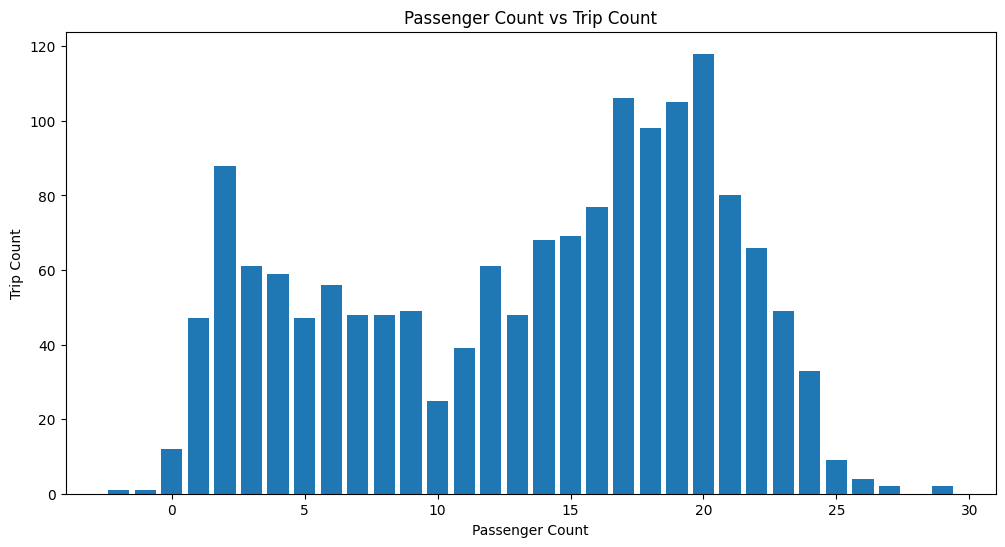

In [ ]:
# Group the dataframe by passenger count and count the number of trips
grouped = data.groupby('passenger_count')['passenger_count'].count()

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped.values)
plt.xlabel('Passenger Count')
plt.ylabel('Trip Count')
plt.title('Passenger Count vs Trip Count')
plt.show()

# References

*  https://towardsdatascience.com/autogluon-deep-learning-automl-5cdb4e2388ec
*  https://learn.microsoft.com/id-id/azure/machine-learning/concept-automated-ml?view=azureml-api-2
*  https://medium.com/@rezapurnama1997/mengenal-catboost-algoritma-boosting-yang-membuat-machine-learning-lebih-efektif-5d679bab4966
*  https://aws.amazon.com/id/what-is/boosting/
*  https://github.com/cuicaihao/aws_nyc_taxi_analysis/tree/master
*  https://chih-ling-hsu.github.io/2018/05/14/NYC#iv-appendix
*  https://github.com/MaharshiYeluri01/TaxiDemandPrediction-Time-Series-